In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [5]:
dataset = pd.read_csv('/content/smoke_detection_iot.csv')
dataset.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
X = dataset[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Pressure[hPa]']]
y = dataset['Fire Alarm']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [9]:
predictions = logistic.predict(X_test)

In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.25      0.39      3605
           1       0.76      0.98      0.86      8921

    accuracy                           0.77     12526
   macro avg       0.81      0.62      0.62     12526
weighted avg       0.79      0.77      0.72     12526



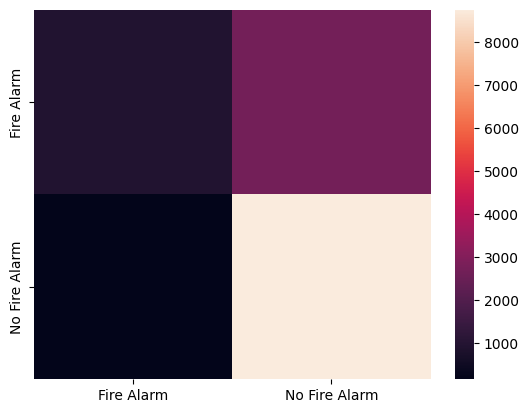

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, predictions)
hm = sns.heatmap(cm, xticklabels=['Fire Alarm', 'No Fire Alarm'], yticklabels=['Fire Alarm', 'No Fire Alarm'])
plt.show()